# Detection of Fake and Real News

## Installing the required libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import re

## Upload data

In [2]:
df_fake = pd.read_csv("DetectionOfFakeAndRealNews/Fake.csv")
df_true = pd.read_csv("DetectionOfFakeAndRealNews/True.csv")


## Assign classes

In [3]:
df_fake["class"] = 0
df_true["class"] = 1

## Merge data

In [4]:
df_merge = pd.concat([df_fake, df_true], axis=0)

## Viewing Data

In [5]:
df_fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [6]:
df_true.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


## Remove unnecessary columns

In [7]:
df = df_merge.drop(["title", "subject", "date"], axis=1)

## Text preprocessing function

In [10]:
def wordopt(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"[^a-zA-ZüğşıöçÜĞŞİÖÇ]", ' ', text)
    return text


## Preprocess text data

In [11]:
df["text"] = df["text"].apply(wordopt)

## shuffle data

In [12]:
df = df.sample(frac=1).reset_index(drop=True)

## Separation into training and test sets

In [13]:
x_train, x_test, y_train, y_test = train_test_split(df["text"], df["class"], test_size=0.25, random_state=42)

## Convert text data to vectors

In [14]:
vectorizer = CountVectorizer(max_features=5000)
x_train_vectors = vectorizer.fit_transform(x_train)
x_test_vectors = vectorizer.transform(x_test)

## Train Multinomial Naive Bayes model

In [15]:
model = MultinomialNB()
model.fit(x_train_vectors, y_train)

MultinomialNB()

## Test

In [16]:
y_pred = model.predict(x_test_vectors)

## Evaluate the results

In [17]:
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5871
           1       0.94      0.95      0.95      5354

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225

Accuracy: 0.9485077951002228


## Confusion Matrix

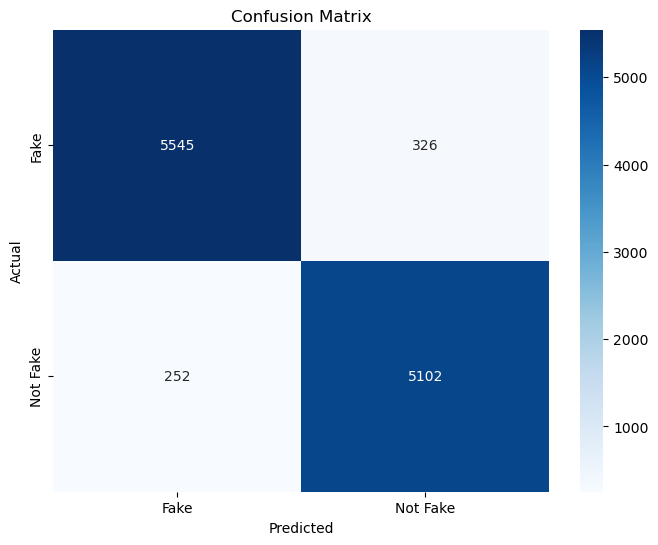

In [18]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Not Fake'], yticklabels=['Fake', 'Not Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Getting 3 random news samples from the data set

In [43]:
random_news = df.sample(3)['text'].tolist()

## Testing randomly selected news in the model

In [44]:
random_vectors = vectorizer.transform(random_news)
random_predictions = model.predict(random_vectors)

## Printing predictions to the screen

In [45]:
for i, news in enumerate(random_news):
    label = "Gerçek" if random_predictions[i] == 1 else "Sahte"
    print(f"Rastgele Haber {i+1}:\n\n{news}\n\nSınıf: {label}\n")

Rastgele Haber 1:

remember when bill o reilly took a vacation after his sexual harassment payoffs went public well let s hope jesse watters vacation is permanent too watters is a product of bill o reilly s former fox news program the racist and sexist segments known as watters world often targeted specific groups in a sick and twisted version of right wing humor from there watters was promoted as a guest host and just days after beginning a full time gig on the five he is already taking time off after making a crude oral sex joke about ivanka trump on the air while discussing trump being jeered and booed in germany for hypocritically talking about empowerment of women watters complained about liberals attacking ivanka and characterized those attacks as anti women even though what liberals are criticizing for is her blatant hypocrisy ivanka claims to be a champion for women s rights but stands idly by while her father signs executive orders reducing protections for women in short she i